## Exploración y carga de datasets
Exploracion de dataset tabular

## Carga de datasets tabulares de transacciones
En la siguiente celda se cargan los archivos `fraudTrain.csv` y `fraudTest.csv`, se añade una columna `dataset` para identificar el origen y se concatenan. Se imprime el tiempo de carga y se muestra una vista previa (head).

In [2]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

# Cargar y combinar ambos CSVs
cols = ["trans_date_trans_time","merchant","category","amt","gender","city","state",
        "zip","lat","long","city_pop","job","dob","trans_num","unix_time","merch_lat",
        "merch_long","is_fraud"]
start = time.time()

df_train = pd.read_csv("fraudTrain.csv", low_memory=False)
df_test = pd.read_csv("fraudTest.csv", low_memory=False)
#agregamos una columna para identificar el origen de los datos
df_train["dataset"] = "train"
df_test["dataset"] = "test"
df = pd.concat([df_train, df_test], ignore_index=True)
end = time.time()
print(f"Tiempo necesario para cargar y combinar archivos CSV: {end - start:.2f} seconds")
print("\n Vista previa de los datos:")
display(df.head())

Tiempo necesario para cargar y combinar archivos CSV: 5.62 seconds

 Vista previa de los datos:


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,dataset
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,train
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,train
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,train
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,train
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,train


## Exploración básica del dataset combinado
Esta celda ejecuta `info()`, revisa nulos y duplicados. Observa el número de filas/columnas, tipos y columnas con valores faltantes para decidir la limpieza posterior.

In [3]:
#Resumen de los datos combinados
df.info()
#Verifico nulos
print("¿Hay nulos?", df.isnull().values.any())
print(df.isnull().sum())
#verifico duplicados
dupes = df.duplicated().sum()
print(f"Duplicados encontrados: {dupes}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 24 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud          

## Estadísticas numéricas
Se calculan estadísticas básicas (`count`, `mean`, `std`, `min`, `max`) de las columnas numéricas. Útil para detectar outliers y escalas disímiles.

In [4]:
# Estadísticas numéricas básicas
numeric_stats = df.describe().T[['count', 'mean', 'std', 'min', 'max']]
print("📈 Estadísticas básicas:\n")
print(numeric_stats)

📈 Estadísticas básicas:

                count          mean           std           min           max
Unnamed: 0  1852394.0  5.371934e+05  3.669110e+05  0.000000e+00  1.296674e+06
cc_num      1852394.0  4.173860e+17  1.309115e+18  6.041621e+10  4.992346e+18
amt         1852394.0  7.006357e+01  1.592540e+02  1.000000e+00  2.894890e+04
zip         1852394.0  4.881326e+04  2.688185e+04  1.257000e+03  9.992100e+04
lat         1852394.0  3.853931e+01  5.071470e+00  2.002710e+01  6.669330e+01
long        1852394.0 -9.022783e+01  1.374789e+01 -1.656723e+02 -6.795030e+01
city_pop    1852394.0  8.864367e+04  3.014876e+05  2.300000e+01  2.906700e+06
unix_time   1852394.0  1.358674e+09  1.819508e+07  1.325376e+09  1.388534e+09
merch_lat   1852394.0  3.853898e+01  5.105604e+00  1.902742e+01  6.751027e+01
merch_long  1852394.0 -9.022794e+01  1.375969e+01 -1.666716e+02 -6.695090e+01
is_fraud    1852394.0  5.210015e-03  7.199217e-02  0.000000e+00  1.000000e+00


## Conteos de variables categóricas
Aquí se listan variables detectadas como objeto y se muestran los top valores de columnas relevantes (`category`, `gender`, `state`, `job`). Sirve para revisar cardinalidad y categorías dominantes.

In [5]:
# Conteos para variables categóricas
cat_cols = df.select_dtypes(include='object').columns
print("\n Variables categóricas detectadas:")
print(list(cat_cols))

for c in ['category', 'gender', 'state', 'job']:
    if c in df.columns:
        print(f"\n--- {c.upper()} ---")
        print(df[c].value_counts().head(10))


 Variables categóricas detectadas:
['trans_date_trans_time', 'merchant', 'category', 'first', 'last', 'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num', 'dataset']

--- CATEGORY ---
category
gas_transport     188029
grocery_pos       176191
home              175460
shopping_pos      166463
kids_pets         161727
shopping_net      139322
entertainment     134118
food_dining       130729
personal_care     130085
health_fitness    122553
Name: count, dtype: int64

--- GENDER ---
gender
F    1014749
M     837645
Name: count, dtype: int64

--- STATE ---
state
TX    135269
NY    119419
PA    114173
CA     80495
OH     66627
MI     65825
IL     62212
FL     60775
AL     58521
MO     54904
Name: count, dtype: int64

--- JOB ---
job
Film/video editor             13898
Exhibition designer           13167
Surveyor, land/geomatics      12436
Naval architect               12434
Materials engineer            11711
Designer, ceramics/pottery    11688
Environmental consultant      1097

## Visualizaciones rápidas
Se grafican las top categorías y la distribución por genero. Observa forma de la distribución (asimetría, colas) y categorías más frecuentes.

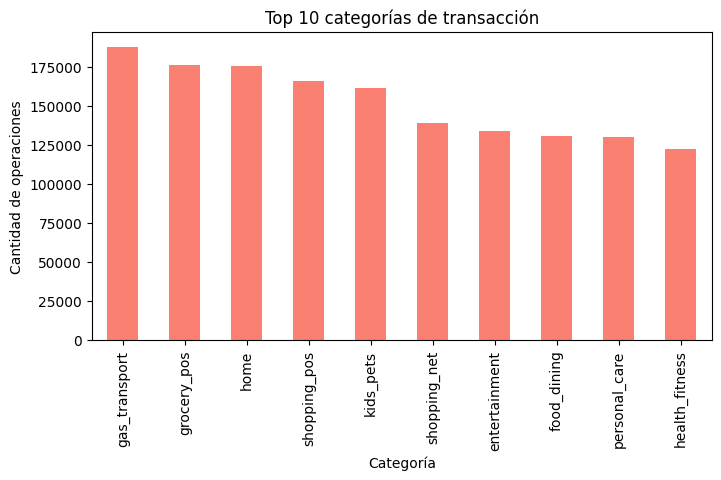

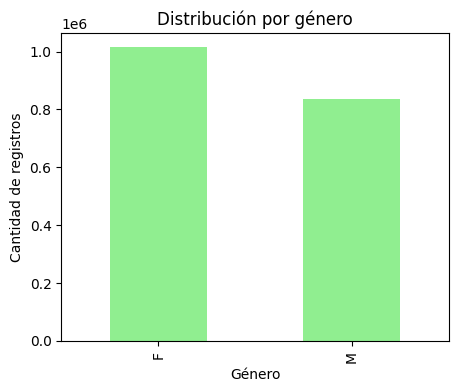

In [6]:
# Visualizaciones rápidas
if 'category' in df.columns:
    plt.figure(figsize=(8,4))
    df['category'].value_counts().head(10).plot(kind='bar', color='salmon')
    plt.title("Top 10 categorías de transacción")
    plt.xlabel("Categoría")
    plt.ylabel("Cantidad de operaciones")
    plt.show()
if 'gender' in df.columns:
    plt.figure(figsize=(5,4))
    df['gender'].value_counts().plot(kind='bar', color='lightgreen')
    plt.title("Distribución por género")
    plt.xlabel("Género")
    plt.ylabel("Cantidad de registros")
    plt.show()

## Estadísticas agrupadas
Se calculan promedios por `gender` y por `state` (top 10). Útil para detectar diferencias sistemáticas entre grupos.

In [7]:
# Promedio de monto por género
if {'gender', 'amt'}.issubset(df.columns):
    print("\n💰 Monto promedio por género:")
    print(df.groupby('gender')['amt'].agg(['mean','std','count']).round(2))

# Promedio de monto por estado (Top 10)
if {'state', 'amt'}.issubset(df.columns):
    print("\n🏙️ Monto promedio por estado (Top 10):")
    print(df.groupby('state')['amt'].mean().sort_values(ascending=False).head(10).round(2))


💰 Monto promedio por género:
         mean     std    count
gender                        
F       69.96  156.15  1014749
M       70.19  162.93   837645

🏙️ Monto promedio por estado (Top 10):
state
DE    514.49
VT     80.57
CO     77.77
NC     77.20
NH     75.87
WY     75.58
AR     75.55
AZ     75.27
DC     75.22
ID     75.03
Name: amt, dtype: float64


## Exploracion dataset no-tabular

In [8]:
start = time.time()
# Rutas de los archivos asignados a "train__path" y "test_path"
train_path="comedy_comparisons.train"
test_path="comedy_comparisons.test"
# Cargamos ambos datasets
train_df = pd.read_csv(train_path, header=None, names=["video_1", "video_2", "label"])
test_df = pd.read_csv(test_path, header=None, names=["video_1", "video_2", "label"])
# Agregamos una columna para saber cual es su origen
train_df["dataset"] = "train"
test_df["dataset"] = "test"
# Unir ambos (uno debajo del otro)
combined_df = pd.concat([train_df, test_df], ignore_index=True)
end = time.time()
print(f"Tiempo necesario para cargar y combinar archivos CSV: {end - start:.2f} seconds")
print("\n Vista previa de los datos:")
display(combined_df.head())

Tiempo necesario para cargar y combinar archivos CSV: 0.22 seconds

 Vista previa de los datos:


,video_1,video_2,label,dataset
0,sNabaB-eb3Y,wHkPb68dxEw,left,train
1,sNabaB-eb3Y,y2emSXSE-N4,left,train
2,fY_FQMQpjok,sNabaB-eb3Y,left,train
3,Vr4D8xO2lBY,sNabaB-eb3Y,right,train
4,sNabaB-eb3Y,dDtRnstrefE,left,train


## Resumen de la estructura y calidad del dataset comedy
Se imprime `info()`, se revisan valores únicos de `label` y la presencia de nulos. Si `label` contiene sólo `left`/`right` (u otros valores esperados), se continúa con análisis; en caso contrario revisar el parseo.

In [9]:
#Resumen de los datos combinados
combined_df.info()
#reviso si label tiene algun valor distinto a left y right
combined_df['label'].unique()
#Verifico nulos
print("¿Hay nulos en el dataset?:", combined_df.isnull().values.any())
print(combined_df.isnull().sum())
if "label" in combined_df.columns:
    print("Valores únicos en label:", combined_df["label"].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1138562 entries, 0 to 1138561
Data columns (total 4 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   video_1  1138562 non-null  object
 1   video_2  1138562 non-null  object
 2   label    1138562 non-null  object
 3   dataset  1138562 non-null  object
dtypes: object(4)
memory usage: 34.7+ MB
¿Hay nulos en el dataset?: False
video_1    0
video_2    0
label      0
dataset    0
dtype: int64
Valores únicos en label: ['left' 'right']


## Conteos y proporciones
Se muestran conteos por etiqueta y por origen (`train`/`test`). Esto permite detectar desbalances y verificar que la concatenación fue correcta.

In [10]:
# Conteo por etiqueta y por dataset
if "label" in combined_df.columns:
    print(combined_df["label"].value_counts(dropna=False).head(20))

if "dataset" in combined_df.columns:
    print(combined_df["dataset"].value_counts(dropna=False))


label
right    589052
left     549510
Name: count, dtype: int64
dataset
train    912969
test     225593
Name: count, dtype: int64


## Estadísticas numéricas derivadas y features simples
Aquí se detectan columnas numéricas (si existen) y se crean features sencillas como la longitud de las rutas/nombres de video para tener proxies numéricos de contenido.

In [11]:
num_cols = combined_df.select_dtypes(include=np.number).columns.tolist()
print("Columnas numéricas:", num_cols)

if num_cols:
    # Promedios, desviaciones, etc.
    basic_stats = combined_df[num_cols].agg(["count","mean","std","min","max"]).T
    print(basic_stats)


Columnas numéricas: []


In [12]:
if {"video_1","video_2"}.issubset(combined_df.columns):
    # largo del nombre/ruta como proxy numérico
    combined_df["len_v1"] = combined_df["video_1"].astype(str).str.len()
    combined_df["len_v2"] = combined_df["video_2"].astype(str).str.len()
    combined_df["pair_len"] = combined_df["len_v1"] + combined_df["len_v2"]

    print(
        combined_df[["len_v1","len_v2","pair_len"]]
        .agg(["count","mean","std","min","max"]).T
    )

# proporciones de clase (útil en clasificación)
if "label" in combined_df.columns:
    prop = (combined_df["label"].value_counts(normalize=True)*100).round(2)
    print("Proporción de clases (%):\n", prop)

              count  mean  std   min   max
len_v1    1138562.0  11.0  0.0  11.0  11.0
len_v2    1138562.0  11.0  0.0  11.0  11.0
pair_len  1138562.0  22.0  0.0  22.0  22.0
Proporción de clases (%):
 label
right    51.74
left     48.26
Name: proportion, dtype: float64


## Visualizaciones finales del dataset comedy
Se grafican la distribución de `label` y el origen (`dataset`). Observa si hay sesgos entre train y test y el balance de clases.

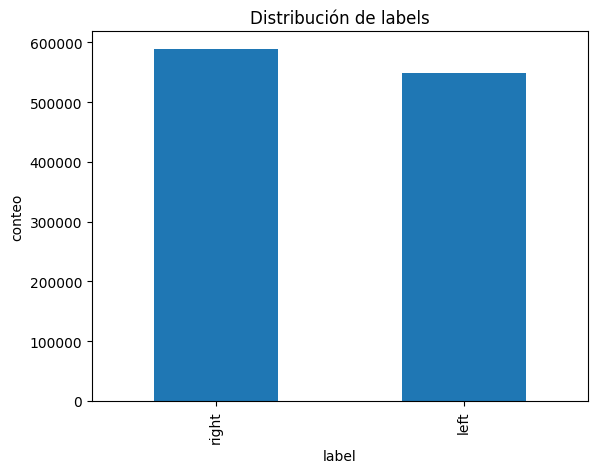

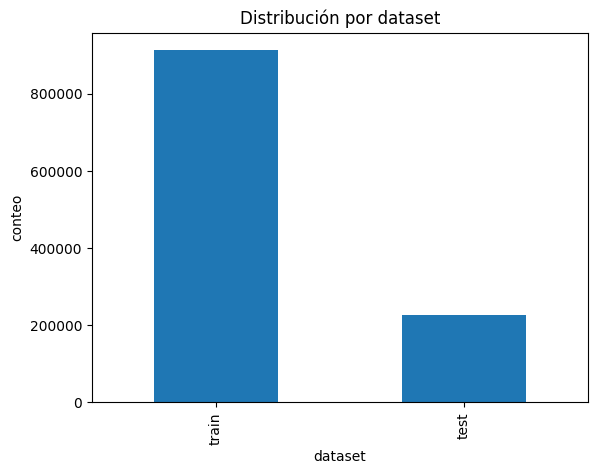

In [13]:

# 1) Barras: distribución de labels
if "label" in combined_df.columns:
    combined_df["label"].value_counts().plot(kind="bar")
    plt.title("Distribución de labels")
    plt.xlabel("label"); plt.ylabel("conteo")
    plt.show()

# 2) Barras: distribución de datasets
if "dataset" in combined_df.columns:
    combined_df["dataset"].value_counts().plot(kind="bar")
    plt.title("Distribución por dataset")
    plt.xlabel("dataset"); plt.ylabel("conteo")
    plt.show()


# Diferencias entre datos tabulares y no tabulares

### Complejidad de análisis
- Los datos tabulares (estructurados) son aquellos que se organizan en filas y columnas, como hojas de cálculo o bases SQL. Cada columna representa una variable y cada fila un registro.
Estos datos son fáciles de analizar con herramientas como Pandas o NumPy, ya que su estructura regular permite realizar operaciones estadísticas, filtrados o agregaciones directamente.
- En cambio, los datos no tabulares (no estructurados) no siguen una forma fija. Pueden ser texto libre, archivos JSON jerárquicos, imágenes, audio, o incluso videos.
Su análisis requiere preprocesamiento adicional para convertirlos a una forma numérica o estructurada antes de aplicar modelos o estadísticas.
### Complejidad de preprocesamiento
Tabular:
- Eliminación de duplicados y valores nulos.
- Conversión de tipos de datos (object → float).
- Normalización o estandarización numérica.
- Creación de variables derivadas (monto_log = log(amt)).
- Codificación de variables categóricas (one-hot encoding, label encoding).
No tabular (texto):
- Eliminación de signos de puntuación y mayúsculas.
- Eliminación de stopwords.
- Lematización o stemming.
- Tokenización.
- Vectorización (TF-IDF, Word2Vec, embeddings).

### Utilidad en Ciencia de Datos
- Los datos tabulares son ideales para modelos estadísticos y de machine learning clásico (regresión, árboles, clustering).
- Los datos no tabulares son más útiles en deep learning (aprendizaje profundo), donde se aplican redes neuronales convolucionales (CNN) para imágenes o modelos de lenguaje (Transformers, LSTM) para texto.

# Ejemplos concretos de transformaciones

### Transformaciones de datos tabulares

Explicación del siguiente bloque de código (tabular → texto vectorizado):

- Se crea un DataFrame de ejemplo con una columna `description` que simula mensajes/textos reales.
- `clean_text`: limpieza básica → pasar a minúsculas y eliminar caracteres que no sean letras/números/espacios .
- `CountVectorizer(stop_words='english')`: tokeniza y construye una matriz "bag-of-words" (conteo de tokens) ignorando palabras vacías en inglés.
- `X` es la matriz dispersa resultante; la última línea construye un DataFrame denso para visualizar la matriz de conteos con columnas = vocabulario.

Qué observar al ejecutar:
- Columnas resultantes: tokens encontrados tras limpieza y tokenización.
- Filas: una por texto de ejemplo; valores numéricos: conteos de cada token.

In [17]:
# Creamos ejemplos de texto que podrían venir en tu dataset real
text_data = pd.DataFrame({
    "description": [
        "Customer reports unauthorized charge on card",
        "Transaction declined, possible system error",
        "Refund processed successfully"
    ]
})

# Limpieza y vectorización básica
text_data['clean_text'] = text_data['description'].str.lower().str.replace(r'[^\w\s]', '', regex=True)

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(text_data['clean_text'])

# Mostrar matriz resultante
pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())


,card,charge,customer,declined,error,possible,processed,refund,reports,successfully,transaction,unauthorized
0,1,1,1,0,0,0,0,0,1,0,0,1
1,0,0,0,1,1,1,0,0,0,0,1,0
2,0,0,0,0,0,0,1,1,0,1,0,0


### Transformaciones de datos no tabulares

Explicación del siguiente bloque de código (texto no estructurado → vectorización):

- Se reutiliza un pequeño conjunto de ejemplos textuales para mostrar el pipeline mínimo de preprocesamiento y vectorización.
- Pasos clave idénticos al ejemplo anterior: limpieza (lower + remoción de puntuación), vectorización con CountVectorizer y creación de una representación matricial.
- Propósito: ilustrar cómo convertir texto no estructurado en una forma numérica (matriz de conteos) que puede ser usada por modelos de ML clásicos.

Qué observar al ejecutar:
- Repite el proceso para otros textos reales; revisar tamaño del vocabulario y filas con tokens más frecuentes.

In [ ]:
text_data = pd.DataFrame({
    "description": [
        "Customer reports unauthorized charge on card",
        "Transaction declined, possible system error",
        "Refund processed successfully"
    ]
})

# Limpieza y vectorización básica
text_data['clean_text'] = text_data['description'].str.lower().str.replace(r'[^\w\s]', '', regex=True)

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(text_data['clean_text'])

# Mostrar matriz resultante
pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())


,card,charge,customer,declined,error,possible,processed,refund,reports,successfully,transaction,unauthorized
0,1,1,1,0,0,0,0,0,1,0,0,1
1,0,0,0,1,1,1,0,0,0,0,1,0
2,0,0,0,0,0,0,1,1,0,1,0,0


# Conclusión final — Comparación entre datos estructurados y no estructurados

El análisis realizado evidencia que los datasets tabulares y no tabulares representan dos enfoques complementarios dentro de la Ciencia de Datos, cada uno con ventajas y desafíos propios.
Los datos tabulares, como los del conjunto de fraude (fraudTrain y fraudTest), ofrecen una estructura clara y uniforme que facilita el preprocesamiento, la aplicación de estadísticas descriptivas, visualizaciones simples y la implementación directa de modelos de machine learning clásico.
Su manipulación con librerías como Pandas es rápida, intuitiva y eficiente, permitiendo obtener información clave a través de operaciones como agrupaciones, normalización o codificación de variables categóricas.

Por otro lado, los datos no tabulares, como texto libre o estructuras JSON, requieren mayor complejidad en el análisis y preprocesamiento.
Antes de poder aplicar cualquier modelo, deben transformarse en una representación numérica —por ejemplo, mediante vectorización (Bag of Words, TF-IDF) o aplanamiento de jerarquías JSON—.
Aunque esto incrementa el trabajo previo, estos datos ofrecen una riqueza semántica y contextual mucho mayor, esencial para tareas de NLP, detección de anomalías o análisis de sentimiento.

En conclusión, mientras los datos tabulares destacan por su simplicidad y precisión estructurada, los no tabulares amplían el alcance analítico hacia fuentes de información más complejas y expresivas.
La integración de ambos tipos de datos constituye una práctica fundamental en proyectos modernos de Ciencia de Datos, permitiendo construir modelos más completos, robustos y cercanos a la realidad de los fenómenos que se estudian.